<a href="https://colab.research.google.com/github/rahmak1960/Obesity-/blob/main/Team5_Key_Indicators_and_Root_Cause_Analysis_of_Obesity_Epidemic_in_the_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Key Indicators and Root Cause Analysis of Obesity Epidemic in the US**

**Project By**: Team 5

**Project Introduction**: Obesity is defined as a BMI ≥ 30. There was only a small rise (approximately 0.5%) in the prevalence of obesity among American adults in the years 1971–1974 to 1976–1980. The obesity epidemic appeared in the USA in 1976–1980 and then spread across Westernized countries. Many thousands of research studies have been carried out on the causes of obesity and effective forms of treatment. Our Focus is to use CDC data to find clear connections between different stratification factors and instances of obesity in US citizens.

**Project Objective/Definition**: This project aims to study the likelihood of an individual be reported as obese via the Behavioral Risk Factor Surveillance System (BRFSS) in the US as a whole as well as division by state, adjusting for various factors including: Age, Education, Income, and Race/Ethnicity. Ultimately the goal is to identify if a leading indicating factor is statistically relevant to help predict hotspots of obesity in the US.

It is important to look at what the indicating factors for obesity are as it can truly help identify social determinants of heath. This information can then further be used to inform public health policies and initiatives to address obesity and related health issues around these different factors. 

Furthermore, such datasets can help determine any if any group (based on categorical classifications) are more inclined to obesity and other health related issues owing to externalities and a root cause analysis can be performed to identify any systemic racism, sexism and/or casteism. 


**Data source**: Behavioral Risk Factor Surveillance System - Centers for Disease Control and Prevention


**Data Download Link:** U.S. Department of Health & Human Services: https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system


**Data Description**: This dataset includes data on adult's diet (consumption of fruits and vegetables), physical activity, and weight status from Behavioral Risk Factor Surveillance System. This data is used for DNPAO's Data, Trends, and Maps database, which provides national and state specific data on obesity, nutrition, physical activity, and breastfeeding.


**Motivation**: This team comprises of individuals with diverse backgrounds and yet a common interest in health and fitness. From participating in sporting events to weightlifting to running everyday, there is a common interest in maintaining a healthy lifestyle. It is interesting to see how this lifestyle is affected by the unspoken conditions in the US.

The dataset contains verious 'classes' of information, such as Obesity / Weight Status, Physical Activity and consumption of Fruits & Vegetables. By observing and analysing this dataset, you can predict your health status based on your own lifestyle choices, but more importantly, improve upon them if required.

**Report Summary**

Obesity is a significant public health concern because it is associated with an increased risk of many chronic health conditions, including heart disease, diabetes, and certain types of cancer. To undersand it better, the report from CDC that surveys and tracks relevant KPIs is being explored. The report below first observes data holistically, the different stratifications or datacuts available, the demographics, the source (in this case - Behavioral Risk Factor Surveillance System), the time horizon, the record count etc.. This information helps us to calibrate as well as understand the scope of our analysis. We then look to see overall trends in the US over time and dig deeper once the trend is established (in this case being that obesity rates have been rising over the years). We firt look at region level (by mapping state level information available in the data to regions ourselves), then further drill down to the state level too. We also not only look at obesity levels, but also physical activity levels and considerations of a healthy diet (consumption of fruits & vegetables). Post the above, we centre ourselves back to what factors might make us more prone towards higher obesity levels by looking at trends over time and those in the latest year.

# ----------------------------------------------------------- Code Starts Here -----------------------------------------------------

In [ ]:
# To start, we will import all required libraries that could be used
import pandas as pd
import numpy as np
import seaborn as sns
import requests #learnt from ChatGPT
import io #learnt from ChatGPT
from IPython.display import Markdown, display
import math
import matplotlib.pyplot as plt
import plotly.express as px


Load Dataset for Analysis

In [ ]:
#First stage - Load raw data
df_raw_data = pd.read_csv('https://data.cdc.gov/api/views/hn4x-zwk7/rows.csv?accessType=DOWNLOAD')
print("Data has been loaded to dataframe successfully.")

Data has been loaded to dataframe successfully.


# Exploratory Stage of the dataset

**Dataset at a glance**

In [ ]:
df_raw_data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


**1. Basic Information about this dataset**

In [ ]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88629 entries, 0 to 88628
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   88629 non-null  int64  
 1   YearEnd                     88629 non-null  int64  
 2   LocationAbbr                88629 non-null  object 
 3   LocationDesc                88629 non-null  object 
 4   Datasource                  88629 non-null  object 
 5   Class                       88629 non-null  object 
 6   Topic                       88629 non-null  object 
 7   Question                    88629 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             88629 non-null  object 
 10  Data_Value                  79851 non-null  float64
 11  Data_Value_Alt              79851 non-null  float64
 12  Data_Value_Footnote_Symbol  8778 non-null   object 
 13  Data_Value_Footnote         877

In [ ]:
df_raw_data.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,88629.000000,88629.000000,0.0,79851.000000,79851.000000,79851.000000,79851.000000,79851.000000,88629.000000
mean,2016.011362,2016.011362,NaN,31.236493,31.236493,26.907732,36.135953,3656.809044,30.906475
std,3.121080,3.121080,NaN,10.113829,10.113829,9.907896,11.061591,18706.392637,17.485456
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.000000,1.000000
25%,2013.000000,2013.000000,NaN,24.300000,24.300000,20.000000,28.600000,516.000000,17.000000
50%,2016.000000,2016.000000,NaN,31.200000,31.200000,26.800000,35.900000,1109.000000,30.000000
75%,2019.000000,2019.000000,NaN,37.000000,37.000000,32.900000,42.200000,2408.000000,45.000000
max,2021.000000,2021.000000,NaN,77.600000,77.600000,70.200000,87.700000,476876.000000,78.000000


Clearly, the above description is not helpful. Delving deeper into the dataset below.

**2. Rows and Columns**

In [ ]:
str_Rows_raw_data = df_raw_data.shape[0]
str_RowsColumns = df_raw_data.shape
print('Number of Rows and Columns of this dataset are: ' + str(str_RowsColumns))


Number of Rows and Columns of this dataset are: (88629, 33)


Observation: We see that there are many null columns and possibly some null rows in the data and these can be removed.

In [ ]:

#To remove the null columns
df_raw_data_version_1 = df_raw_data.dropna(axis = 1, how = 'all')

print('New number of columns in the dataset are: ' + str(df_raw_data_version_1.shape[1]))
print('')

#df_raw_data_version_2 = df_raw_data_version_1.dropna(axis = 0, how = 'all')
#print(df_raw_data_version_2.shape)
# Count and drop rows with all null values
null_rows = df_raw_data_version_1.isnull().sum(axis=1)
all_null_rows = null_rows[null_rows == df_raw_data_version_1.shape[1]]
df_raw_data_version_2 = df_raw_data_version_1.drop(index=all_null_rows.index)
str_Rows_df_raw_data_version_2 = df_raw_data_version_2.shape[0]

str_RowsColumns = df_raw_data_version_2.shape
print('Number of Rows and Columns of the cleaned up dataset are: ' + str(str_RowsColumns))
print('')
if str_Rows_df_raw_data_version_2 == str_Rows_raw_data:
  
 print('There are no completely null rows in the dataset')
else:
 print('The new number of rows in the dataset are:' + str(str_Rows_df_raw_data_version_2))

New number of columns in the dataset are: 32

Number of Rows and Columns of the cleaned up dataset are: (88629, 32)

There are no completely null rows in the dataset


In [ ]:
df_raw_data_version_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88629 entries, 0 to 88628
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   88629 non-null  int64  
 1   YearEnd                     88629 non-null  int64  
 2   LocationAbbr                88629 non-null  object 
 3   LocationDesc                88629 non-null  object 
 4   Datasource                  88629 non-null  object 
 5   Class                       88629 non-null  object 
 6   Topic                       88629 non-null  object 
 7   Question                    88629 non-null  object 
 8   Data_Value_Type             88629 non-null  object 
 9   Data_Value                  79851 non-null  float64
 10  Data_Value_Alt              79851 non-null  float64
 11  Data_Value_Footnote_Symbol  8778 non-null   object 
 12  Data_Value_Footnote         8778 non-null   object 
 13  Low_Confidence_Limit        798

Creating 2 functions that we will be using in a lot of exploration.

In [ ]:
def get_unique_info(dataset, column):

    unique_values = dataset[column].unique()
    clean_list = [x for x in unique_values if (isinstance(x, str) or not math.isnan(x))]
    unique_count = len(clean_list)
    clean_list.sort()
    return unique_count, clean_list

In [ ]:
def print_lists(input_list):
  for value in input_list:
    print("• " + str(value))

*** Unique Data Sources in the dataset**

In [ ]:
unique_count, unique_values = get_unique_info(df_raw_data_version_2,'Datasource')

print('There is/are ' + str(unique_count) + ' Unique data source(s) covered in this dataset. This is/These are: ')
print_lists(unique_values)


There is/are 1 Unique data source(s) covered in this dataset. This is/These are: 
• Behavioral Risk Factor Surveillance System


*** Range of years covered in this dataset**

In [ ]:
str_Start_Year_min_value = df_raw_data_version_2['YearStart'].min()
str_Start_Year_max_value = df_raw_data_version_2['YearEnd'].max()
print('This dataset has data ranging between the following years: ' + str(str_Start_Year_min_value) + ' - ' + str(str_Start_Year_max_value))

This dataset has data ranging between the following years: 2011 - 2021


*** Are there studies that last more than a year?**

In [ ]:
#sourced from ChatGPT

df_raw_data_version_2['Time For Study'] = df_raw_data_version_2.apply(lambda row: 1 if row['YearStart'] == row['YearEnd'] else 0, axis=1)

int_output = df_raw_data_version_2['Time For Study'].nunique()
if int_output == 1:
  print('All studies last 1 year')
else:
  print('There are studies that last more than 1 year')


All studies last 1 year


*** Where in the US is the data derived from?**

In [ ]:
# This code was developed using an interitive approach an utilized a combination of Data Camp resources, Chat GPT, Stack Overflow. All of the specific alterations to use the data within our selected set were done by Chris S.
# Filter the data to only include rows with the specified value in the specified column
unique_count_location = df_raw_data_version_2['LocationDesc'].nunique()
unique_values_location = df_raw_data_version_2['LocationDesc'].unique().tolist()
unique_values_location_sorted = sorted(unique_values_location)

#Pull out non-states to highlight them after listing all 50 states
unique_location_list = ['Guam', 'District of Columbia', 'Puerto Rico', 'United States', 'Virgin Islands']

# Output the value and the actual string results from the lists, first highlighting the 50 states.
print('There are all ' + str(unique_count_location - len(unique_location_list)) + ' states covered in this dataset. These are: ')
for value in unique_values_location_sorted:
    if value not in unique_location_list:
        print("• " + str(value))

# This outputs the non-states within the category
print('')
print('There are also the territories covered along with the whole of the United States these are represented as:')
print_lists(unique_location_list)

      

There are all 50 states covered in this dataset. These are: 
• Alabama
• Alaska
• Arizona
• Arkansas
• California
• Colorado
• Connecticut
• Delaware
• Florida
• Georgia
• Hawaii
• Idaho
• Illinois
• Indiana
• Iowa
• Kansas
• Kentucky
• Louisiana
• Maine
• Maryland
• Massachusetts
• Michigan
• Minnesota
• Mississippi
• Missouri
• Montana
• National
• Nebraska
• Nevada
• New Hampshire
• New Jersey
• New Mexico
• New York
• North Carolina
• North Dakota
• Ohio
• Oklahoma
• Oregon
• Pennsylvania
• Rhode Island
• South Carolina
• South Dakota
• Tennessee
• Texas
• Utah
• Vermont
• Virginia
• Washington
• West Virginia
• Wisconsin
• Wyoming

There are also the territories covered along with the whole of the United States these are represented as:
• Guam
• District of Columbia
• Puerto Rico
• United States
• Virgin Islands


***   What are the different Stratifications classifications in which this data is divided?**

In [ ]:
unique_count, unique_values = get_unique_info(df_raw_data_version_2,'StratificationCategory1')

print('There are ' + str(unique_count) + ' different Stratifications/Classifications categories covered in this dataset. These are: ')
print_lists(unique_values)

There are 6 different Stratifications/Classifications categories covered in this dataset. These are: 
• Age (years)
• Education
• Gender
• Income
• Race/Ethnicity
• Total


***   What are the different Stratification categories within this dataset?**


In [ ]:

df_final = pd.DataFrame({})
for value in unique_values:
  df_temp = df_raw_data_version_2[df_raw_data_version_2['StratificationCategory1']==value]
  unique_count_1, unique_values_1 = get_unique_info(df_temp,'Stratification1')
  display(Markdown(value))
  print_lists(unique_values_1)
  print('')
  print("Count: " + str(unique_count_1))
  print('')

Age (years)

• 18 - 24
• 25 - 34
• 35 - 44
• 45 - 54
• 55 - 64
• 65 or older

Count: 6



Education

• College graduate
• High school graduate
• Less than high school
• Some college or technical school

Count: 4



Gender

• Female
• Male

Count: 2



Income

• $15,000 - $24,999
• $25,000 - $34,999
• $35,000 - $49,999
• $50,000 - $74,999
• $75,000 or greater
• Data not reported
• Less than $15,000

Count: 7



Race/Ethnicity

• 2 or more races
• American Indian/Alaska Native
• Asian
• Hawaiian/Pacific Islander
• Hispanic
• Non-Hispanic Black
• Non-Hispanic White
• Other

Count: 8



Total

• Total

Count: 1



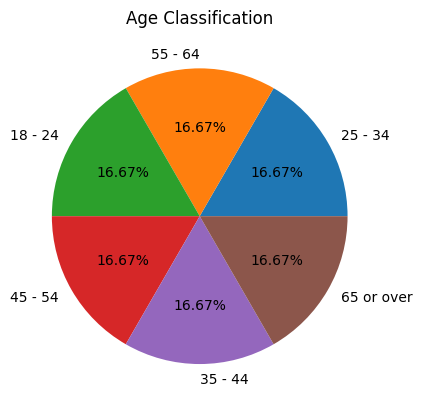

In [ ]:


# Define the age categories
age_labels = ['Under 18', '18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65 or over']

# Create a mapping between the age ranges in your dataset and the age labels
age_mapping = {
    '65 or older': age_labels[6],
    '18 - 24': age_labels[1],
    '25 - 34': age_labels[2],
    '35 - 44': age_labels[3],
    '45 - 54': age_labels[4],
    '55 - 64': age_labels[5]
}

# Apply the age mapping to the 'Age(years)' column
df_raw_data_version_3 = df_raw_data_version_2.copy()
df_raw_data_version_3['Age Category'] = df_raw_data_version_3['Age(years)'].map(age_mapping)

# Apply the categorize_age function to the 'Age(years)' column
#df['Age Category'] = df['Age(years)'].apply(categorize_age)

# Use value_counts function to get the frequency of each age category
age_frequencies = df_raw_data_version_3['Age Category'].value_counts()

# Calculate the percentage for each category
age_percentage = age_frequencies / age_frequencies.sum() * 100

# Create the pie chart with percentages
plt.pie(age_frequencies, labels=age_frequencies.index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('Age Classification')
plt.show()

While we created this chart, we realize this may not be representative of the information hence we have not continued trying to do the same for other factors.

*** What different types of Topics are covered within the dataset?**

In [ ]:

unique_count, unique_values = get_unique_info(df_raw_data_version_2,'Topic')

print('There are ' + str(unique_count) + ' different diseases/causes covered in this dataset. These are: ')
print_lists(unique_values)


There are 3 different diseases/causes covered in this dataset. These are: 
• Fruits and Vegetables - Behavior
• Obesity / Weight Status
• Physical Activity - Behavior


*** What survey questions are being asked in this dataset?**

In [ ]:
unique_count, unique_values = get_unique_info(df_raw_data_version_2,'Question')

print('There are ' + str(unique_count) + ' different questions covered in this dataset. These are: ')
for value in unique_values:
    print("• " + str(value))

There are 9 different questions covered in this dataset. These are: 
• Percent of adults aged 18 years and older who have an overweight classification
• Percent of adults aged 18 years and older who have obesity
• Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
• Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
• Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
• Percent of adults who engage in muscle-strengthening activities on 2 or more days a week
• Percent of adults who engage in no leisure-time 

*** Which column has the max null values?**

In [ ]:
# Count null values for each column
null_counts = df_raw_data_version_2.isna().sum()

# Sort in descending order
null_counts_sorted = null_counts.sort_values(ascending=False)

# Print column with maximum null values
print("Column with maximum null values:", null_counts_sorted.index[0])
print("Maximum null values:", null_counts_sorted.iloc[0])

Column with maximum null values: Total
Maximum null values: 85464


*This makes sense because the various stratification Categories are also available as columns with data only populated in them when that particular stratification category is being referred to.*



*   To make the data more observable from an anaysis point of view, we're performing **one hot encoding** on Gender and Education




In [ ]:
df_raw_data_version_2

df_education = df_raw_data_version_2['Education']

df_dummified = pd.get_dummies(df_education, drop_first=True)  # One-hot encoding - very simple way of taking a categorical variable and creating columns for each unique value. Putting a value of 1 or 0 helps classifiy if it is that value. We  
df_dummified

df_raw_data_version_education = pd.merge(df_raw_data_version_2, df_dummified, left_index = True, right_index = True)
df_raw_data_version_education.head(4)

#df_dummified.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Time For Study,High school graduate,Less than high school,Some college or technical school
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,30.6,...,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS,1,0,0,0
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.3,...,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD,1,1,0,0
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,28.8,...,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075,1,0,0,0
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.7,...,VALUE,59,Income,Data not reported,INC,INCNR,1,0,0,0


* Similarly for Education

In [ ]:
df_raw_data_version_2

df_gender = df_raw_data_version_2['Gender']

df_dummified = pd.get_dummies(df_gender, drop_first=True)  # One-hot encoding - very simple way of taking a categorical variable and creating columns for each unique value. Putting a value of 1 or 0 helps classifiy if it is that value. We  
df_dummified

df_raw_data_version_Gender = pd.merge(df_raw_data_version_2, df_dummified, left_index = True, right_index = True)
df_raw_data_version_Gender.rename(columns={'Male': 'Is Male?'}, inplace=True)
df_raw_data_version_Gender.head(4)



,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Time For Study,Is Male?
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,30.6,...,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS,1,0
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.3,...,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD,1,0
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,28.8,...,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075,1,0
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.7,...,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR,1,0


* Looking at Missing Data

In [ ]:
df_raw_data_version_missing = df_raw_data_version_2[df_raw_data_version_2['Data_Value_Footnote']== 'Data not available because sample size is insufficient.']
print('There are ' + str(df_raw_data_version_missing.shape[0]) + ' with missing values')
df_raw_data_version_missing['StratificationCategory1'].value_counts()



There are 8778 with missing values


Race/Ethnicity    8424
Income             124
Age (years)        102
Education           68
Gender              34
Total               17
Name: StratificationCategory1, dtype: int64

1 way could be to check the distribution of data to see if we should fill with mean, median or altogether drop the rows:

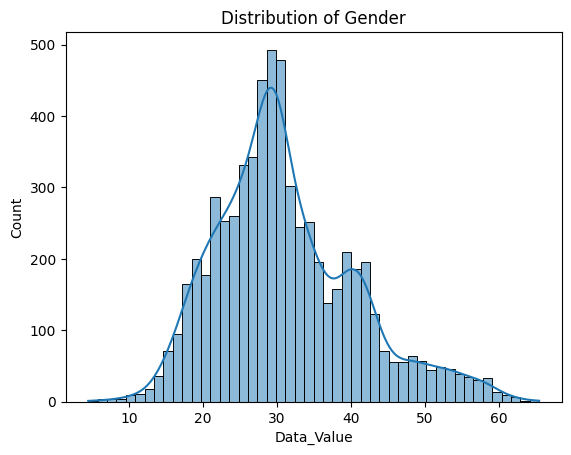

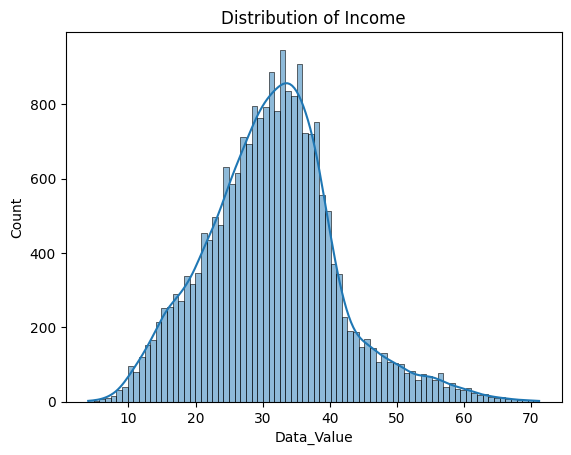

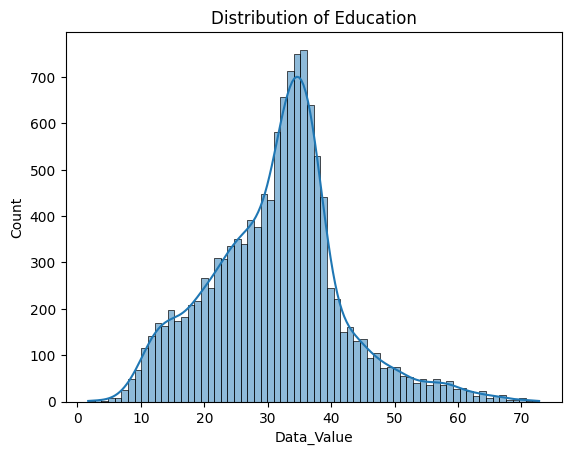

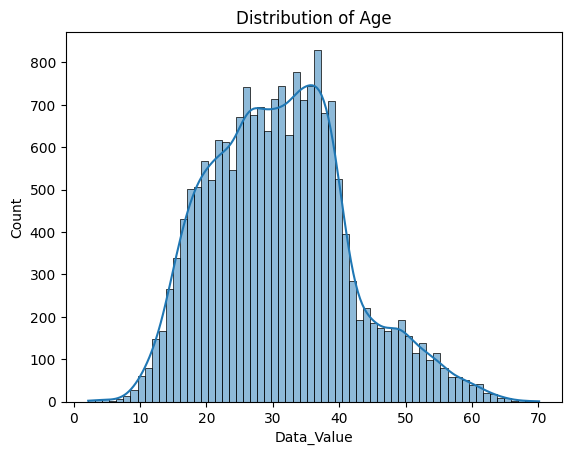

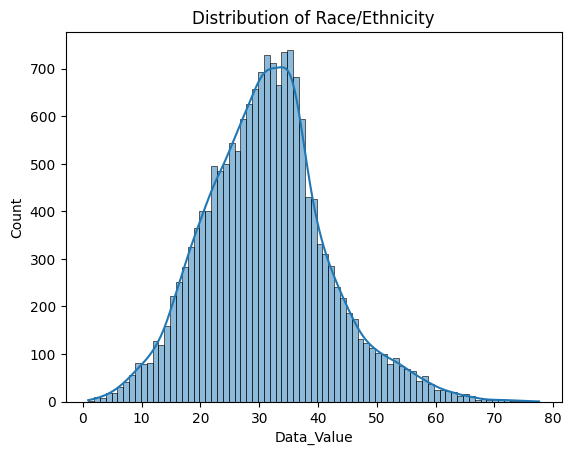

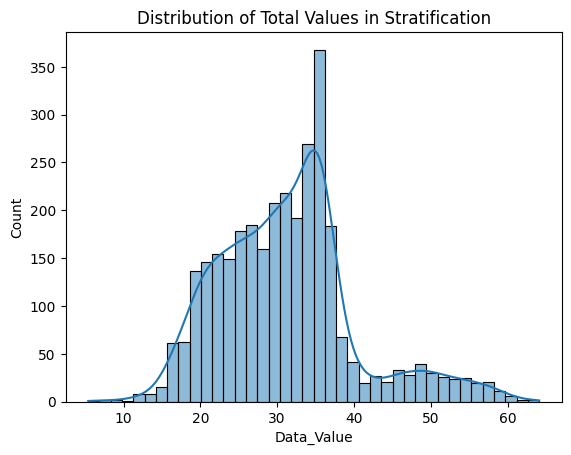

In [ ]:
df_gender = df_raw_data_version_2[df_raw_data_version_2['StratificationCategory1'] == 'Gender']
df_income = df_raw_data_version_2[df_raw_data_version_2['StratificationCategory1'] == 'Income']
df_education = df_raw_data_version_2[df_raw_data_version_2['StratificationCategory1'] == 'Education']
df_total = df_raw_data_version_2[df_raw_data_version_2['StratificationCategory1'] == 'Total']
df_age = df_raw_data_version_2[df_raw_data_version_2['StratificationCategory1'] == 'Age (years)']
df_race = df_raw_data_version_2[df_raw_data_version_2['StratificationCategory1'] == 'Race/Ethnicity']

fig, axs = plt.subplots(ncols=1)
#fig.subplots_adjust(wspace=1)
# create histogram
sns.histplot(data=df_gender, x='Data_Value', kde=True).set(title='Distribution of Gender')
plt.show()

fig.subplots_adjust(wspace=1)
sns.histplot(data=df_income, x='Data_Value', kde=True).set(title='Distribution of Income')
plt.show()

fig.subplots_adjust(wspace=1)

sns.histplot(data=df_education, x='Data_Value', kde=True).set(title = 'Distribution of Education')
plt.show()

fig.subplots_adjust(wspace=1)
sns.histplot(data=df_age, x='Data_Value', kde=True).set(title = 'Distribution of Age')
plt.show()

fig.subplots_adjust(wspace=1)
sns.histplot(data=df_race, x='Data_Value', kde=True).set(title='Distribution of Race/Ethnicity')
plt.show()
fig.subplots_adjust(wspace=1)

sns.histplot(data=df_total, x='Data_Value', kde=True).set(title='Distribution of Total Values in Stratification')
plt.show()

# create density plot
#sns.kdeplot(data=df_gender, x='Data_Value')
#plt.show()

**MISSING INFORMATION**: Based on a self reading from the source: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/, we understand missing values can be classified into a few types: 
1. Missing at Random
2. Missing Completely at Random (MCAR)
3. Missing not at Random (MNAR)


Most of the stratifications above seem like information that users would voluntarily input into the survey OR could also choose to omit. Based on the article, this MNAR information should not be removed from the data, hence while we identify it exists, we have chosen to not remove it.



# **US (National) Obesity Level over Time**

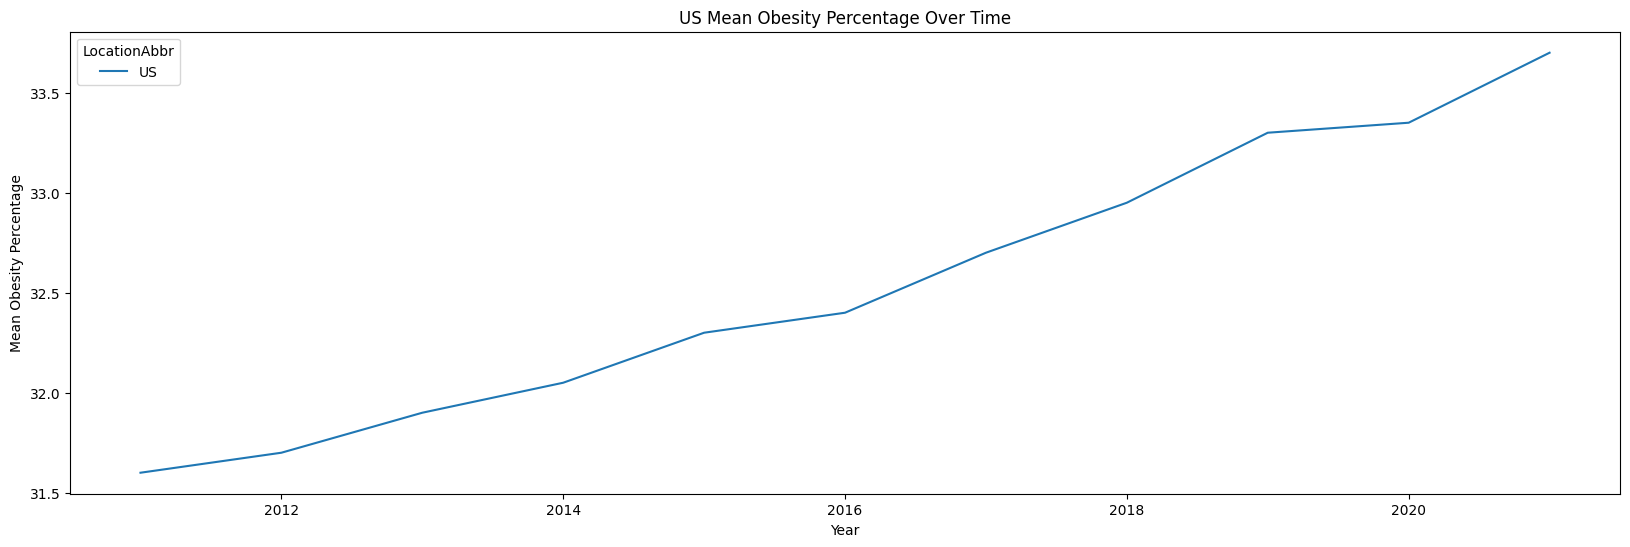

In [ ]:
df_raw_version_2 = df_raw_data_version_2
df_raw_version_2 = df_raw_version_2[(df_raw_version_2['LocationDesc']=='National') &
                                    (df_raw_version_2['StratificationCategory1']=='Total') &
                                    (df_raw_version_2['Class']=='Obesity / Weight Status')]

df_grouped = df_raw_version_2.groupby(['LocationAbbr','YearStart'])['Data_Value'].mean()

# Reshape data to have one column per state and year
df_pivot = df_grouped.reset_index().pivot(index='YearStart', columns='LocationAbbr', values='Data_Value')

# Create line chart
df_pivot.plot(kind='line', figsize=(20, 6))

# Add title and axis labels
plt.title('US Mean Obesity Percentage Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Obesity Percentage')

# Show plot
plt.show()


**Takeaway**: Clearly, obesity rates have increased steadily over time. We want to dig deeper into why this has happened and what factors correlate with this trend.

# **Obesity By Region Over Time**

In [ ]:
state_regions = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Group the data by region and display information
df_raw_region = df_raw_data_version_2
df_raw_region['Region'] = df_raw_region['LocationDesc'].map(state_regions)

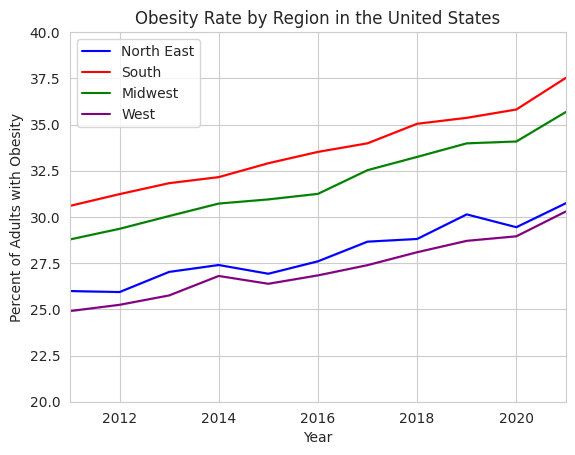

In [ ]:
# Filter the data to only include rows with the specified value in the specified column
filtered_df_NE = df_raw_region.loc[(df_raw_region['Region'] == 'Northeast') & 
                              (df_raw_region['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_region['StratificationCategoryId1'] == 'OVR'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the S range
filtered_df_S = df_raw_region.loc[(df_raw_region['Region'] == 'South') & 
                              (df_raw_region['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                               (df_raw_region['StratificationCategoryId1'] == 'OVR'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the MW range
filtered_df_MW = df_raw_region.loc[(df_raw_region['Region'] == 'Midwest') & 
                              (df_raw_region['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                               (df_raw_region['StratificationCategoryId1'] == 'OVR'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the W range
filtered_df_W = df_raw_region.loc[(df_raw_region['Region'] == 'West') & 
                              (df_raw_region['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_region['StratificationCategoryId1'] == 'OVR'),
                              ['YearStart', 'Data_Value']]


# Merge the filtered dataframes on YearStart
merged_df = pd.merge(filtered_df_NE, filtered_df_S, on='YearStart', suffixes=('_NE', '_S'))
merged_df = pd.merge(merged_df, filtered_df_MW, on='YearStart')
merged_df = pd.merge(merged_df, filtered_df_W, on='YearStart')


#Amended Column names due to error when adding in final income band of less than $15k
merged_df = merged_df.rename(columns={'Data_Value_x': 'Data_Value_MW', 'Data_Value_y': 'Data_Value_W'})

#Add in final income band
merged_df = pd.merge(merged_df, filtered_df_NE, on='YearStart')

# Set the chart style
sns.set_style("whitegrid")

# Create a line chart using the filtered data
sns.lineplot(x="YearStart", y="Data_Value_NE", data=merged_df, color='b', label='North East')
sns.lineplot(x="YearStart", y="Data_Value_S", data=merged_df, color='r', label='South')
sns.lineplot(x="YearStart", y="Data_Value_MW", data=merged_df, color='g', label='Midwest')
sns.lineplot(x="YearStart", y="Data_Value_W", data=merged_df, color='purple', label='West')


# Set the chart title and axis labels
plt.title('Obesity Rate by Region in the United States')
plt.xlabel('Year')
plt.ylabel('Percent of Adults with Obesity')

# Set the x/y-axis limits
plt.ylim(20, 40)
plt.xlim(2011, 2021)

plt.legend()

# Display the chart
plt.show()

In [ ]:
df_raw_region.to_csv('output.csv')

**Takeaway**: Essentially the trends of obesity haven't changed, apart from West region inching closer to the higher obesity levels of the Midwest. We can see Obesity Rates just rising across the years ubiquitously. While some regions are doing better than others, the overall situation is clearly grim. An important factor is that people living the in the South and Midwest are predominantly at the risk of being obese.

# **Obesity by States Over Time**

*** Obesity Spread across the US**

In [ ]:



df_raw_data_US_Map_start_o = df_raw_data_version_2[(df_raw_data_version_2['Class'] == 'Obesity / Weight Status') & 
                                           (df_raw_data_version_2['Question'] == 'Percent of adults aged 18 years and older who have obesity') & # | (df_raw_data_version_2['Question'] =='Percent of adults aged 18 years and older who have an overweight classification') &
                                           (df_raw_data_version_2['LocationDesc'] != 'National') &
                                           (df_raw_data_version_2['StratificationCategory1'] == 'Total') &
                                           (df_raw_data_version_2['YearEnd'] == str_Start_Year_min_value)]


df_raw_data_US_Map_end_o = df_raw_data_version_2[(df_raw_data_version_2['Class'] == 'Obesity / Weight Status') & 
                                           (df_raw_data_version_2['Question'] == 'Percent of adults aged 18 years and older who have obesity') & # | (df_raw_data_version_2['Question'] =='Percent of adults aged 18 years and older who have an overweight classification') &
                                           (df_raw_data_version_2['LocationDesc'] != 'National') &
                                           (df_raw_data_version_2['StratificationCategory1'] == 'Total') &
                                           (df_raw_data_version_2['YearEnd'] == str_Start_Year_max_value)]


fig1 = px.choropleth(df_raw_data_US_Map_start_o,locations="LocationAbbr",locationmode="USA-states",scope="usa",color="Data_Value",range_color=[15, 45], color_continuous_scale="Viridis", title = 'Obsesity Levels by State in ' + str(str_Start_Year_min_value)) 
#fig.show()
fig2 = px.choropleth(df_raw_data_US_Map_end_o,locations="LocationAbbr",locationmode="USA-states",scope="usa",color="Data_Value",range_color=[15,45 ], color_continuous_scale="Viridis",  title = 'Obsesity Levels by State in ' + str(str_Start_Year_max_value)) 
#fig.show()

fig1.update_layout(
    margin=dict(l=10, r=10, t=100, b=10),
    width=750,
    height=400
)

fig2.update_layout(
    margin=dict(l=10, r=10, t=100, b=10),
    width=750,
    height=400
)

fig1.show()
fig2.show()



**TAKEAWAY**
 Through the 2 charts we can clearly see that more states are creeped towards higher level of obesity levels. Below we will also see overweight classification, Physical fitness levels and consumption of fruits & vegetables.

*** Showcasing the correlation of Obesity Rate by State in the Latest and Earliest Year of the data in a different way to be more clear**


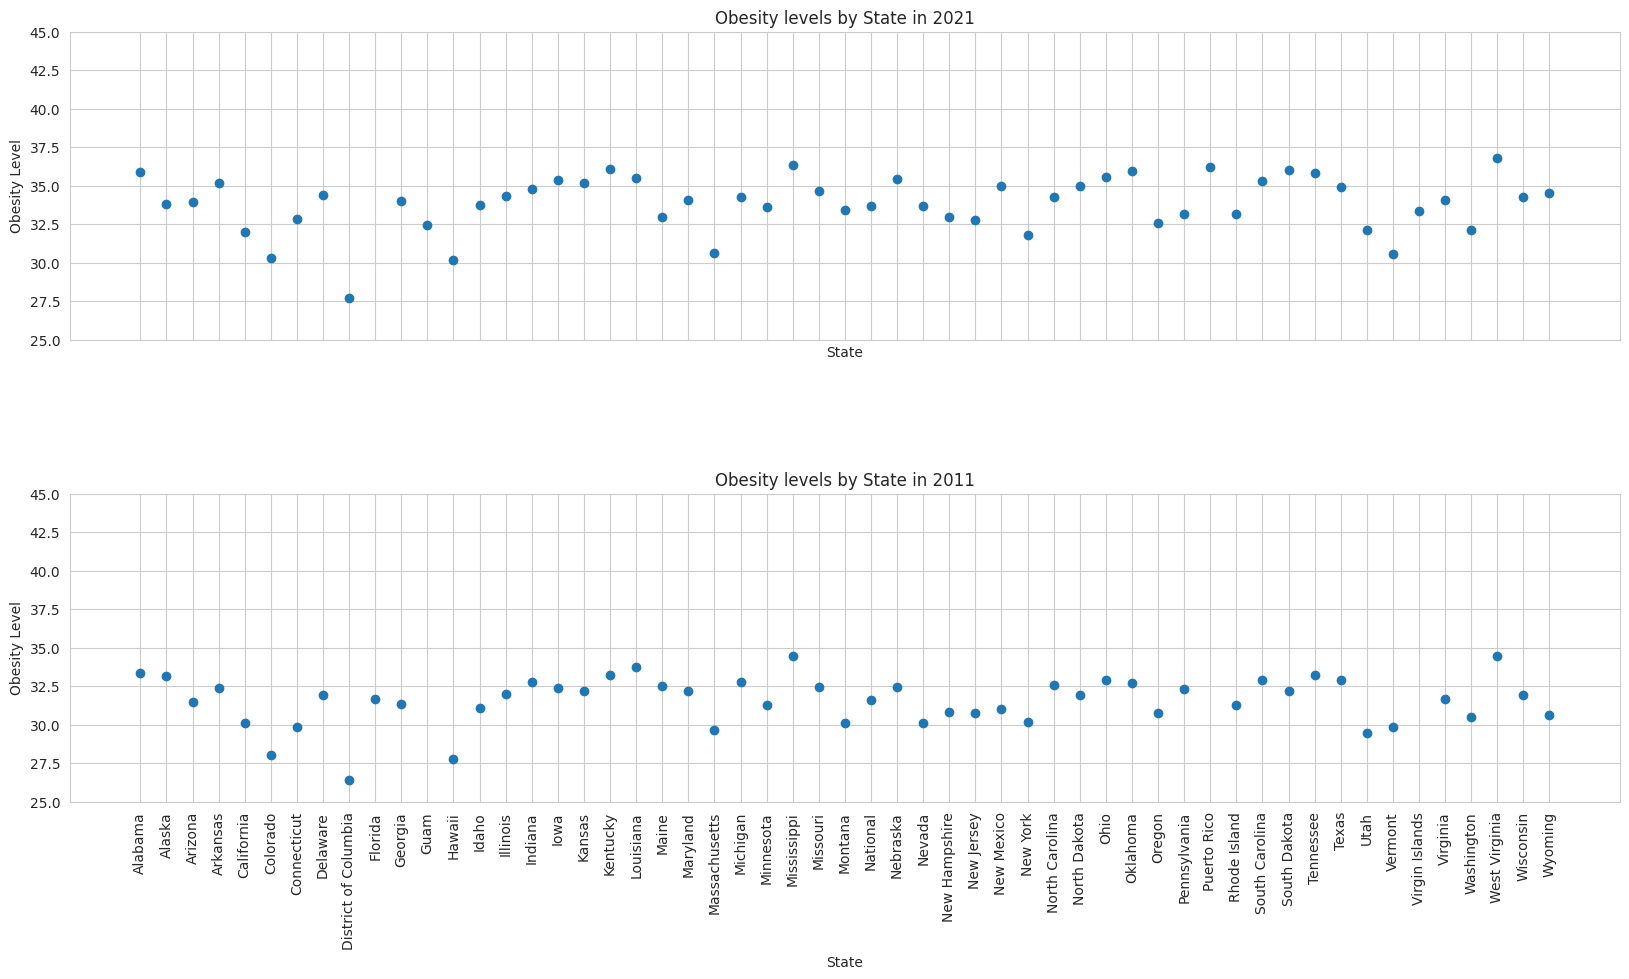

In [ ]:
Years_to_consider = [str_Start_Year_max_value, str_Start_Year_min_value]
df_raw_data_version_3 = df_raw_data_version_2[(df_raw_data_version_2['YearEnd'].isin(Years_to_consider)) & (df_raw_data_version_2['Topic']== 'Obesity / Weight Status') &
                                              (df_raw_data_version_2['StratificationCategory1'] == 'Total')]

# Group data by state and calculate the mean obesity level for each state
df_mean_obesity = df_raw_data_version_3.groupby(['LocationDesc','YearEnd']).agg({'Data_Value': 'mean'})

# Set plot size
fig, axs = plt.subplots(2,1, figsize=(20, 10),sharex=True, gridspec_kw={'hspace': 0.5})

# Loop through each subplot and create a scatter plot for each year
for i, year in enumerate(Years_to_consider):
    axs[i].scatter(df_mean_obesity.loc[(slice(None), year), :].index.get_level_values(0), 
                   df_mean_obesity.loc[(slice(None), year), 'Data_Value'])
    axs[i].set_title(f'Obesity levels by State in {year}')
    axs[i].set_xlabel('State')
    axs[i].set_ylabel('Obesity Level')
    axs[i].tick_params(axis='x', rotation=90)
    axs[i].set_ylim(bottom=25, top=45)  

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

**Takeaway**: Through this chart we can see that District of Columbia has the least and Puerto Rico & West Virginia have had the highet Obesity Levels by State respectively. This trend has also remained over time, i.e. we can see that in that both in the start year and the end year, this trend remained (Puerto Rico does not have data captured for 2011). We checked and confirmed from the data that there was nothing amiss.

**Physical Fitness Levels By State**

In [ ]:
df_raw_data_US_Map_start_p = df_raw_data_version_2[(df_raw_data_version_2['Class'] == 'Physical Activity') & 
                                           (df_raw_data_version_2['Question'] == 'Percent of adults who engage in no leisure-time physical activity') & #| (df_raw_data_version_2['Question'] =='Percent of adults aged 18 years and older who have an overweight classification') &
                                           (df_raw_data_version_2['LocationDesc'] != 'National') &
                                           (df_raw_data_version_2['StratificationCategory1'] == 'Total') &
                                           (df_raw_data_version_2['YearEnd'] == str_Start_Year_min_value)]


df_raw_data_US_Map_end_p = df_raw_data_version_2[(df_raw_data_version_2['Class'] == 'Physical Activity') & 
                                           (df_raw_data_version_2['Question'] == 'Percent of adults who engage in no leisure-time physical activity') & #| (df_raw_data_version_2['Question'] =='Percent of adults aged 18 years and older who have an overweight classification') &
                                           (df_raw_data_version_2['LocationDesc'] != 'National') &
                                           (df_raw_data_version_2['StratificationCategory1'] == 'Total') &
                                           (df_raw_data_version_2['YearEnd'] == str_Start_Year_max_value)]


fig3 = px.choropleth(df_raw_data_US_Map_start_p,locations="LocationAbbr",locationmode="USA-states",scope="usa",color="Data_Value",range_color=[15, 40], color_continuous_scale="Viridis", title = 'Physical In-Activity Levels by State in ' + str(str_Start_Year_min_value)) 
#fig.show()
fig4 = px.choropleth(df_raw_data_US_Map_end_p,locations="LocationAbbr",locationmode="USA-states",scope="usa",color="Data_Value",range_color=[15, 40], color_continuous_scale="Viridis",  title = 'Physical In-Activity Levels by State in ' + str(str_Start_Year_max_value)) 
#fig.show()

fig3.update_layout(
    margin=dict(l=10, r=10, t=100, b=10),
    width=750,
    height=400
)

fig4.update_layout(
    margin=dict(l=10, r=10, t=100, b=10),
    width=750,
    height=400
)

fig3.show()
fig4.show()




Takeaway: This chart shows the states with highest inactivity. The results make sense with the previous maps that showed obesity. Clearly, we can see that states with high in-activity also have higher obesity rates and vice versa. For example, CO (Colorado) has the lowest level of inactivity and also the lowest level of obesity.

**Lack of Consumption of Fruits & Vegetables By State**

In [ ]:
df_raw_data_US_Map_start_vf = df_raw_data_version_2[(df_raw_data_version_2['Class'] == 'Fruits and Vegetables') & 
                                           #(df_raw_data_version_2['Question'] == 'Percent of adults who report consuming vegetables less than one time daily') & #| (df_raw_data_version_2['Question'] =='Percent of adults who report consuming fruit less than one time daily') &
                                           (df_raw_data_version_2['LocationDesc'] != 'National') &
                                           (df_raw_data_version_2['StratificationCategory1'] == 'Total') &
                                           (df_raw_data_version_2['YearEnd'] == 2017)]


df_raw_data_US_Map_end_vf = df_raw_data_version_2[(df_raw_data_version_2['Class'] == 'Fruits and Vegetables') & 
                                           #(df_raw_data_version_2['Question'] == 'Percent of adults who report consuming vegetables less than one time daily') & #| (df_raw_data_version_2['Question'] =='Percent of adults who report consuming fruit less than one time daily') &
                                           (df_raw_data_version_2['LocationDesc'] != 'National') &
                                           (df_raw_data_version_2['StratificationCategory1'] == 'Total') &
                                           (df_raw_data_version_2['YearEnd'] == str_Start_Year_max_value)]


fig5 = px.choropleth(df_raw_data_US_Map_start_vf,locations="LocationAbbr",locationmode="USA-states",scope="usa",color="Data_Value", color_continuous_scale="Viridis", title = 'Paucity of Consumption of Fruits & Vegetables by State in 2017') 
#fig.show()
fig6 = px.choropleth(df_raw_data_US_Map_end_vf,locations="LocationAbbr",locationmode="USA-states",scope="usa",color="Data_Value", color_continuous_scale="Viridis",  title = 'Paucity of Consumption of Fruits & Vegetables by State in ' + str(str_Start_Year_max_value)) 
#fig.show()

fig5.update_layout(
    margin=dict(l=10, r=10, t=100, b=10),
    width=750,
    height=400
)

fig6.update_layout(
    margin=dict(l=10, r=10, t=100, b=10),
    width=750,
    height=400
)

fig5.show()
fig6.show()


**Takeaway**: An interesting point to note here is that the consumption of Fruits and Vegetables was not tracked initially as part of this data and was only started in 2017. 


Let's quickly look at this data in a little more depth.


# **Correlation of Consumption of Fruits & Vegetables & Obesity Levels across States in each year available**

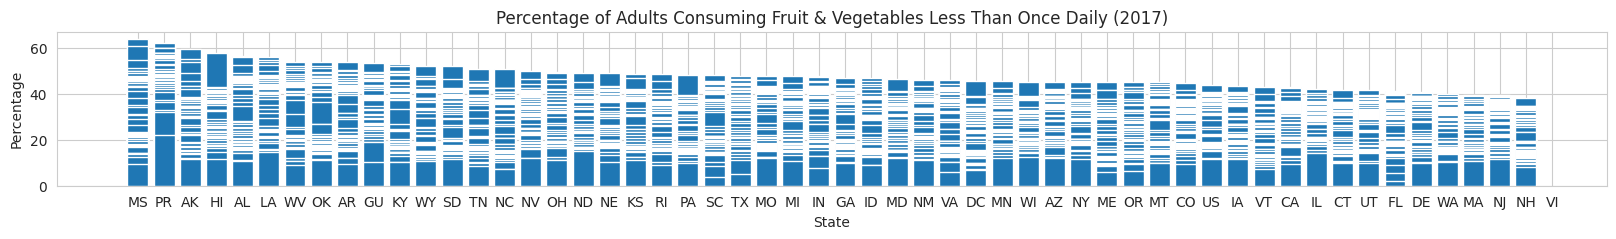

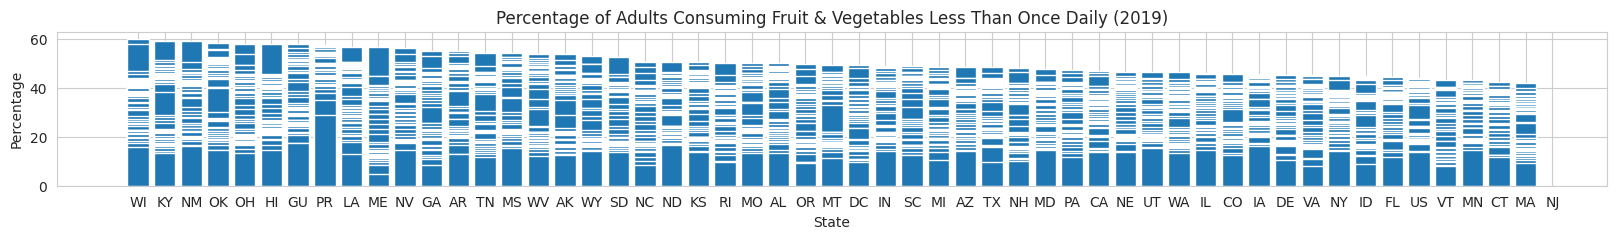

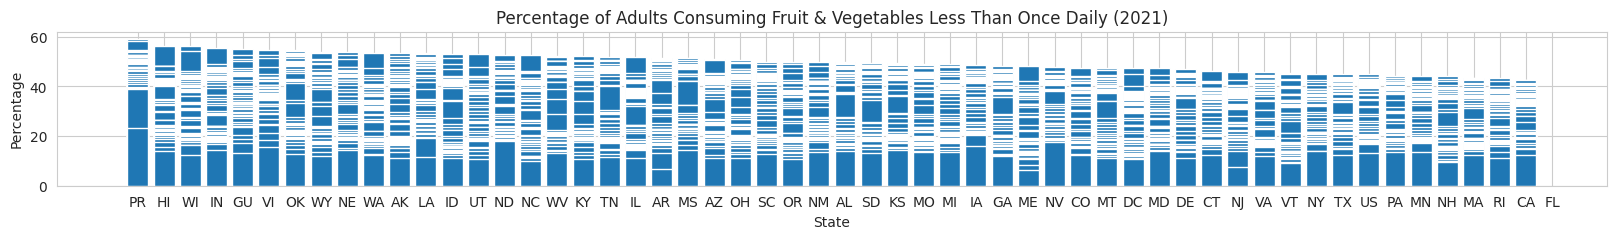

In [ ]:
# Filter data to include only necessary columns
df_filtered = df_raw_data_version_2[['YearStart', 'LocationAbbr', 'Data_Value', 'Question']]

# Filter data to include only adults who report consuming fruit less than one time daily
#df_filtered = df_filtered[df_filtered['Question'] == 'Percent of adults who report consuming fruit less than one time daily']
df_filtered = df_filtered[(df_filtered['Question'] == 'Percent of adults who report consuming vegetables less than one time daily') | (df_filtered['Question'] =='Percent of adults who report consuming fruit less than one time daily')] 
# Group data by state and compute the mean percentage
#df_grouped = df_filtered.groupby('LocationAbbr')['Data_Value'].mean()
df_grouped = df_filtered.groupby(['LocationAbbr', 'YearStart'])['Data_Value'].mean()
df_grouped

for year in df_grouped.index.get_level_values('YearStart').unique():
    df_filtered_year = df_filtered[df_filtered['YearStart'] == year]
    df_filtered_year = df_filtered_year.sort_values('Data_Value', ascending=False)
    plt.figure(figsize=(20, 2))  # Increase the width of the figure
    plt.bar(df_filtered_year['LocationAbbr'], df_filtered_year['Data_Value'])
    plt.title(f'Percentage of Adults Consuming Fruit & Vegetables Less Than Once Daily ({year})')
    plt.xlabel('State')
    plt.ylabel('Percentage')

**Takeaway**: Looking at this data, we see that Puerto Rico (PR), Hawaii (HI), Oklahoma (OK) have consistently been in the top 10 States where the Percentage of adults consuming fruits & vegetables has been less than once daily. PR and OK also have low physical activity and the combination of this results in high obesity rates. However HI shows higher physical activity levels which helps with lower obesity levels.


Summarizing the observations above:

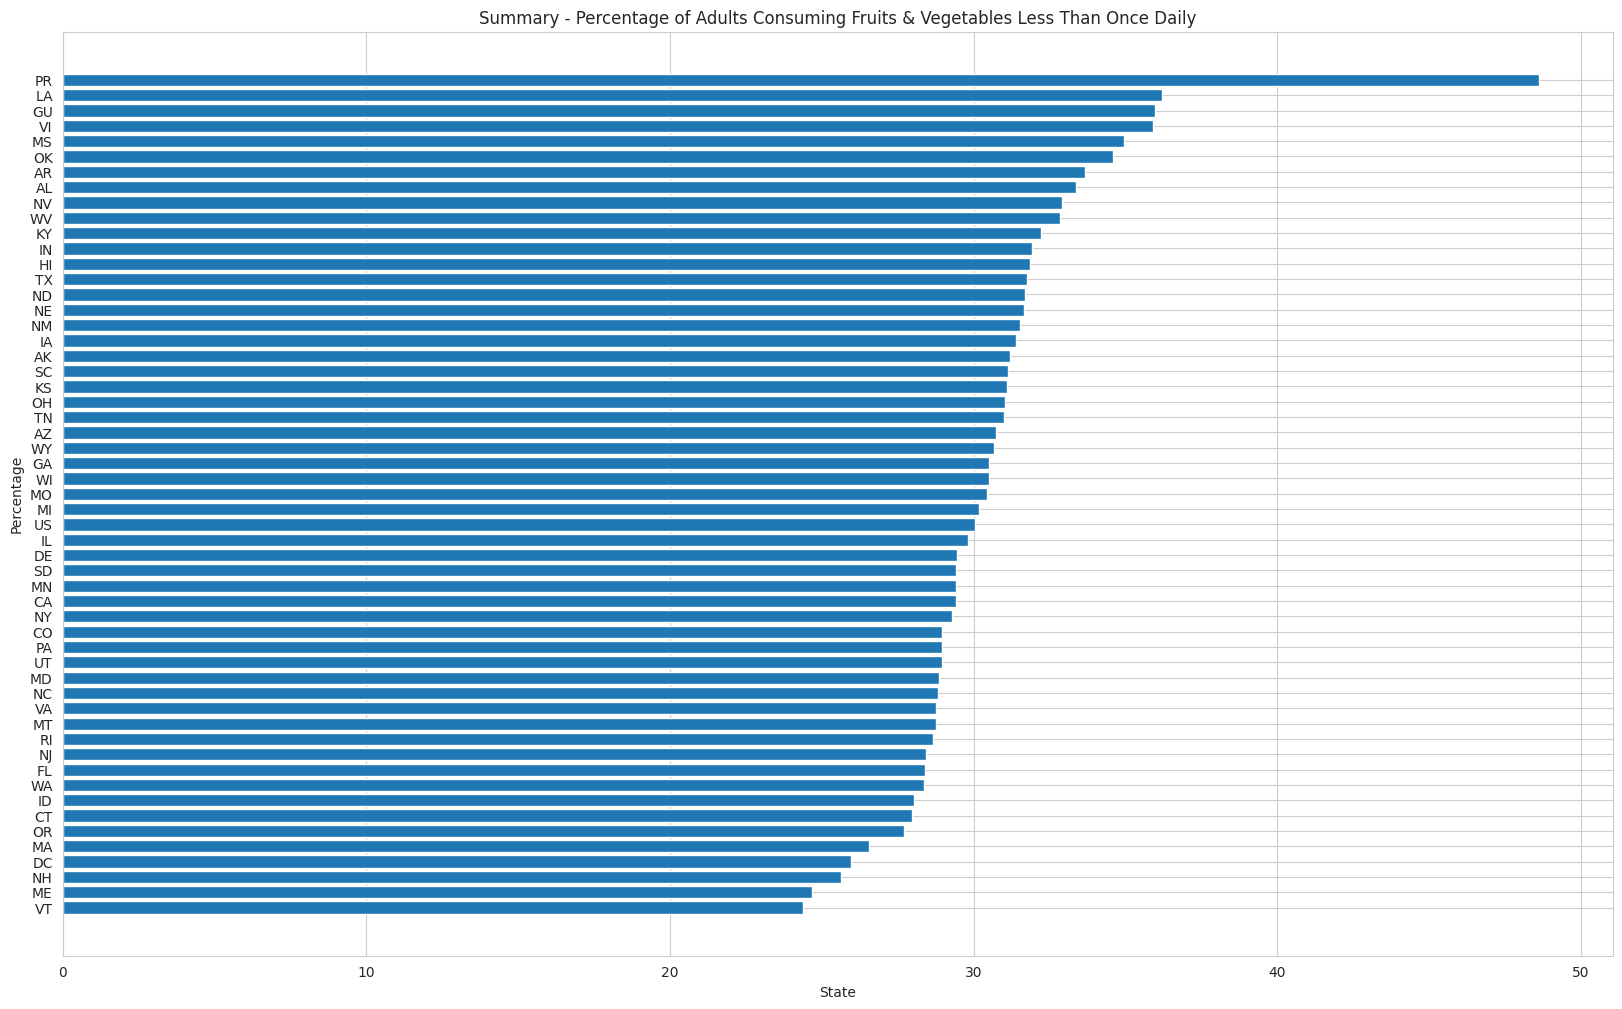

In [ ]:
# Filter data to include only necessary columns
df_filtered = df_raw_data_version_2[['YearStart', 'LocationAbbr', 'Data_Value', 'Question']]

# Filter data to include only adults who report consuming vegetables less than one time daily
#df_filtered = df_filtered[df_filtered['Question'] == 'Percent of adults who report consuming vegetables less than one time daily']
df_filtered = df_filtered[(df_filtered['Question'] == 'Percent of adults who report consuming vegetables less than one time daily') | (df_filtered['Question'] =='Percent of adults who report consuming fruit less than one time daily')] 
# Group data by state and compute the mean percentage
df_grouped = df_filtered.groupby('LocationAbbr')['Data_Value'].mean()
df_grouped = df_grouped.sort_values(ascending=True)
# Create bar chart of the percentage of adults who report consuming vegetables less than one time daily, breakdown by state
plt.figure(figsize=(20, 12))  # Increase the width of the figure
plt.barh(df_grouped.index, df_grouped.values)
plt.title('Summary - Percentage of Adults Consuming Fruits & Vegetables Less Than Once Daily')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.show()

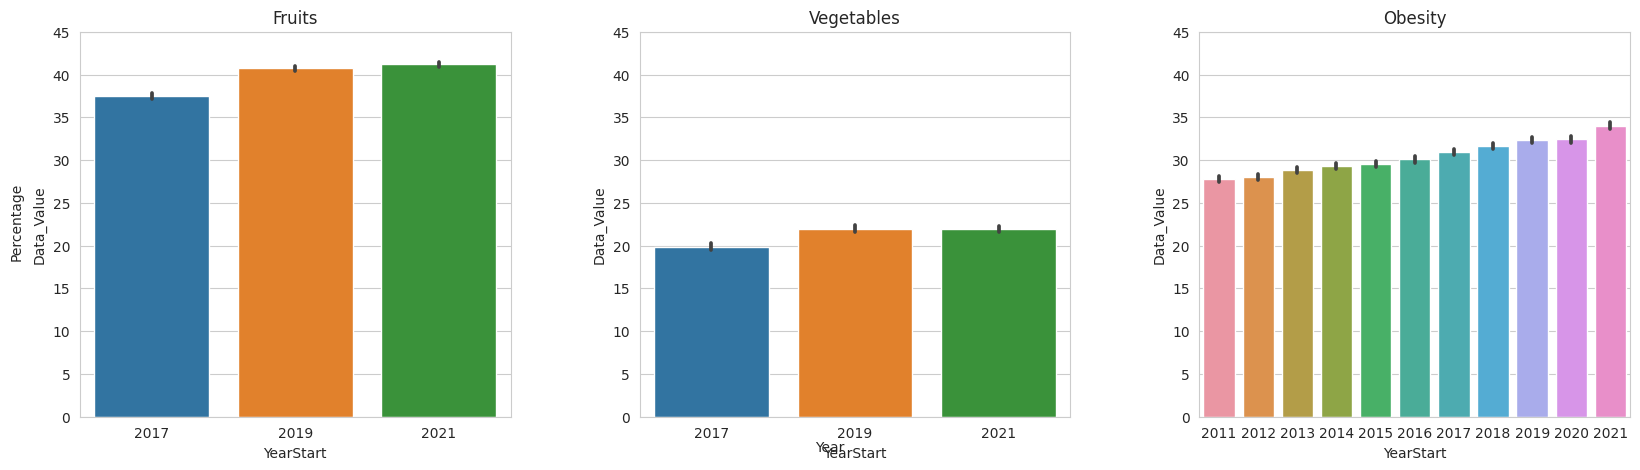

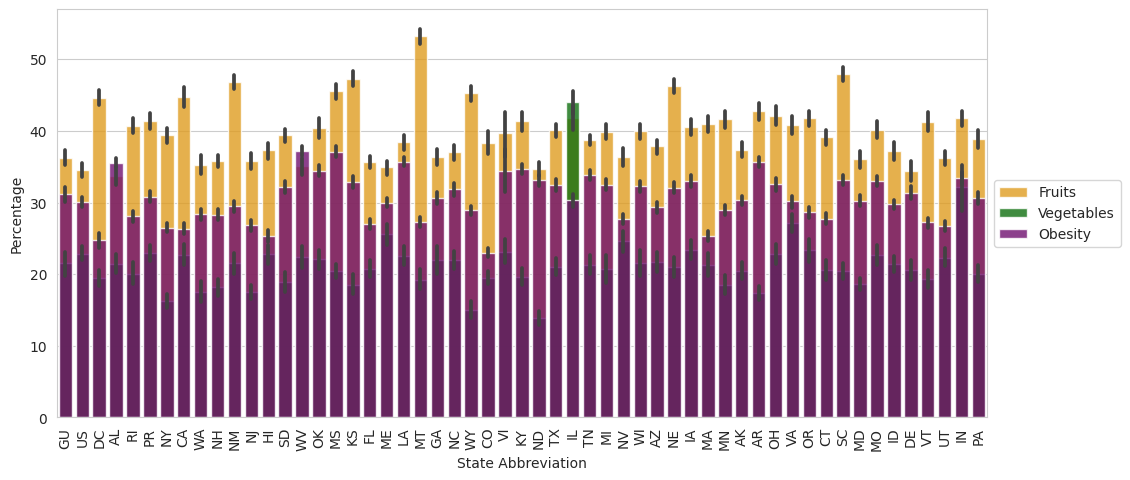

In [ ]:
# subplot 1 - Percent of adults who report consuming fruits less than one time daily
df_fruit = df_raw_data_version_2[df_raw_data_version_2['Question'] == 'Percent of adults who report consuming fruit less than one time daily']
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.barplot(x='YearStart', y='Data_Value', data=df_fruit, ax=axs[0])
axs[0].set_title('Fruits')
axs[0].set_ylim(0, 45) 

# subplot 2 - Percent of adults who report consuming vegetables less than one time daily
df_veggie = df_raw_data_version_2[df_raw_data_version_2['Question'] == 'Percent of adults who report consuming vegetables less than one time daily']
sns.barplot(x='YearStart', y='Data_Value', data=df_veggie, ax=axs[1])
axs[1].set_title('Vegetables')
axs[1].set_ylim(0, 45) 

# subplot 3 - Percent of adults aged 18 years and older who have obesity
df_obesity = df_raw_data_version_2[df_raw_data_version_2['Question'] == 'Percent of adults aged 18 years and older who have obesity']
sns.barplot(x='YearStart', y='Data_Value', data=df_obesity, ax=axs[2])
axs[2].set_title('Obesity')
axs[2].set_ylim(0, 45) 

# set common y label
fig.text(0.5, 0.04, 'Year', ha='center')
fig.text(0.09, 0.5, 'Percentage', va='center', rotation='vertical')

# adjust subplot spacing
plt.subplots_adjust(wspace=0.3)

# create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Percent of adults who report consuming fruits less than one time daily
df_fruit = df_raw_data_version_2[df_raw_data_version_2['Question'] == 'Percent of adults who report consuming fruit less than one time daily']
sns.barplot(x='LocationAbbr', y='Data_Value', data=df_fruit, color='orange', alpha=0.8, label='Fruits', ax=ax)

# Percent of adults who report consuming vegetables less than one time daily
df_veggie = df_raw_data_version_2[df_raw_data_version_2['Question'] == 'Percent of adults who report consuming vegetables less than one time daily']
sns.barplot(x='LocationAbbr', y='Data_Value', data=df_veggie, color='green', alpha=0.8, label='Vegetables', ax=ax)

# Percent of adults aged 18 years and older who have obesity
df_obesity = df_raw_data_version_2[df_raw_data_version_2['Question'] == 'Percent of adults aged 18 years and older who have obesity']
sns.barplot(x='LocationAbbr', y='Data_Value', data=df_obesity, color='purple', alpha=0.8, label='Obesity', ax=ax)

# set common labels
ax.set_xlabel('State Abbreviation')
ax.set_ylabel('Percentage')

# add legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# adjust spacing to prevent x-axis label from getting cut off
plt.subplots_adjust(bottom=0.2)

# rotate x-tick labels for better readability
plt.xticks(rotation=90)

# show plot
plt.show()

**Takeaway**: The Percentage of People consuming Fruits and Vegetables has reduced over Time. We also see that the Obesity Levels have increased during these years. While not the only factor, it is contingent to note that there is a correlation between lower consumption of fruits and vegetables and increasing Obesity Levels.

# **Correlation of Obesity Rate and Income Level in the United States**

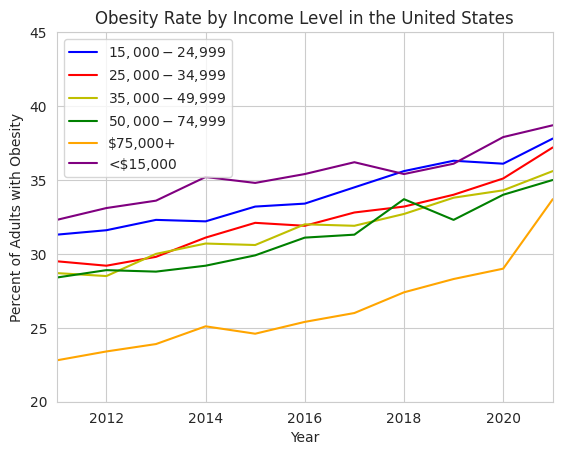

In [ ]:
df_raw_data = df_raw_data_version_2
# Filter the data to only include rows with the specified value in the specified column
filtered_df_1525 = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Income'] == '$15,000 - $24,999'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the $25k to $35k range
filtered_df_2535 = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Income'] == '$25,000 - $34,999'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the $35k to $50k range
filtered_df_3550 = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Income'] == '$35,000 - $49,999'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the $50k to $75k range
filtered_df_5075 = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Income'] == '$50,000 - $74,999'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the $75k+
filtered_df_75above = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Income'] == '$75,000 or greater'),
                              ['YearStart', 'Data_Value']]

# Filter the data for less than $15k a year
filtered_df_15less = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Income'] == 'Less than $15,000'),
                              ['YearStart', 'Data_Value']]  

# Merge the filtered dataframes on YearStart
merged_df = pd.merge(filtered_df_1525, filtered_df_2535, on='YearStart', suffixes=('_1525', '_2535'))
merged_df = pd.merge(merged_df, filtered_df_3550, on='YearStart')
merged_df = pd.merge(merged_df, filtered_df_5075, on='YearStart')
merged_df = pd.merge(merged_df, filtered_df_75above, on='YearStart')

#Amended Column names due to error when adding in final income band of less than $15k
merged_df = merged_df.rename(columns={'Data_Value_x': 'Data_Value_3550', 'Data_Value_y': 'Data_Value_5075', 'Data_Value': 'Data_Value_75+'})

#Add in final income band
merged_df = pd.merge(merged_df, filtered_df_15less, on='YearStart')

# Set the chart style
sns.set_style("whitegrid")

# Create a line chart using the filtered data
sns.lineplot(x="YearStart", y="Data_Value_1525", data=merged_df, color='b', label='$15,000-$24,999')
sns.lineplot(x="YearStart", y="Data_Value_2535", data=merged_df, color='r', label='$25,000-$34,999')
sns.lineplot(x="YearStart", y="Data_Value_3550", data=merged_df, color='y', label='$35,000-$49,999')
sns.lineplot(x="YearStart", y="Data_Value_5075", data=merged_df, color='g', label='$50,000-$74,999')
sns.lineplot(x="YearStart", y="Data_Value_75+", data=merged_df, color='orange', label='$75,000+')
sns.lineplot(x="YearStart", y="Data_Value", data=merged_df, color='purple', label='<$15,000')

# Set the chart title and axis labels
plt.title('Obesity Rate by Income Level in the United States')
plt.xlabel('Year')
plt.ylabel('Percent of Adults with Obesity')

# Set the x/y-axis limits
plt.ylim(20, 45)
plt.xlim(2011, 2021)

plt.legend()

# Display the chart
plt.show()

**Takeaway**: It appears the data suggests that there is a clear connection with an increase in annual income and a reduction in expected obesity rate for adults. 

This is a typically associated with having a healthier diet requires additonal resources to be able afford to purchase comparitave more expensive food and ingrediants. Conversly, at lower income levels, focus is placed on ease of access, affordability and minimal effort which traditionally translates to less healthy dietary options (i.e. fastfood). 

Below we have a better visualization of the disparity of this effect highlighting the highest and lowest bands of income:

*** Correlation of Obesity Rate and Income Level in the United States**

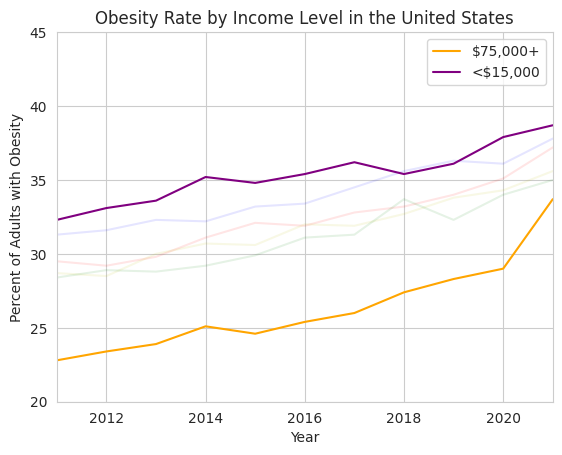

In [ ]:
df_raw_data = df_raw_data_version_2
# Filter the data to only include rows with the specified value in the specified column
filtered_df_1525 = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Income'] == '$15,000 - $24,999'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the $25k to $35k range
filtered_df_2535 = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Income'] == '$25,000 - $34,999'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the $35k to $50k range
filtered_df_3550 = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Income'] == '$35,000 - $49,999'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the $50k to $75k range
filtered_df_5075 = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Income'] == '$50,000 - $74,999'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the $75k+
filtered_df_75above = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Income'] == '$75,000 or greater'),
                              ['YearStart', 'Data_Value']]

# Filter the data for less than $15k a year
filtered_df_15less = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Income'] == 'Less than $15,000'),
                              ['YearStart', 'Data_Value']]  

# Merge the filtered dataframes on YearStart
merged_df = pd.merge(filtered_df_1525, filtered_df_2535, on='YearStart', suffixes=('_1525', '_2535'))
merged_df = pd.merge(merged_df, filtered_df_3550, on='YearStart')
merged_df = pd.merge(merged_df, filtered_df_5075, on='YearStart')
merged_df = pd.merge(merged_df, filtered_df_75above, on='YearStart')

#Amended Column names due to error when adding in final income band of less than $15k
merged_df = merged_df.rename(columns={'Data_Value_x': 'Data_Value_3550', 'Data_Value_y': 'Data_Value_5075', 'Data_Value': 'Data_Value_75+'})

#Add in final income band
merged_df = pd.merge(merged_df, filtered_df_15less, on='YearStart')

# Set the chart style
sns.set_style("whitegrid")

# Create a line chart using the filtered data
sns.lineplot(x="YearStart", y="Data_Value_1525", data=merged_df, color='b', alpha = 0.1)
sns.lineplot(x="YearStart", y="Data_Value_2535", data=merged_df, color='r', alpha = 0.1)
sns.lineplot(x="YearStart", y="Data_Value_3550", data=merged_df, color='y', alpha = 0.1)
sns.lineplot(x="YearStart", y="Data_Value_5075", data=merged_df, color='g', alpha = 0.1)
sns.lineplot(x="YearStart", y="Data_Value_75+", data=merged_df, color='orange', label='$75,000+')
sns.lineplot(x="YearStart", y="Data_Value", data=merged_df, color='purple', label='<$15,000')

# Set the chart title and axis labels
plt.title('Obesity Rate by Income Level in the United States')
plt.xlabel('Year')
plt.ylabel('Percent of Adults with Obesity')

# Set the x/y-axis limits
plt.ylim(20, 45)
plt.xlim(2011, 2021)

plt.legend()

# Display the chart
plt.show()

**Takeaway**: Here we see the disparty amplified where at its greatest has those that earn greater than USD 75,000 a year and those that earn less than USD 15,000 a year.  At the greatest points of disparty we observe that there was a 10.2% differance between these two groups in the years 2015 and 2017. The period of least disparity is the most recent year observed, 2021. The cause is likely common acorss all six groups, the COVID pandemic left many with limited option and difficulty maintaining a healthy diet.

# **Correlation of Obesity Rate and Education in the United States**

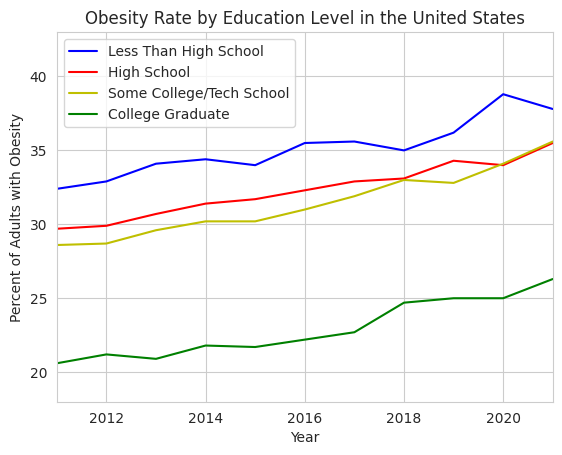

In [ ]:
df_raw_data = df_raw_data_version_2
# Filter the data to only include rows with the specified value in the specified column
filtered_df_less = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Education'] == 'Less than high school'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the $25k to $35k range
filtered_df_high = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Education'] == 'High school graduate'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the $35k to $50k range
filtered_df_tech = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Education'] == 'Some college or technical school'),
                              ['YearStart', 'Data_Value']]

#Add in the data for the $50k to $75k range
filtered_df_coll = df_raw_data.loc[(df_raw_data['LocationDesc'] == 'National') & 
                              (df_raw_data['Question'] == 'Percent of adults aged 18 years and older who have obesity') & 
                              (df_raw_data['Education'] == 'College graduate'),
                              ['YearStart', 'Data_Value']]


# Merge the filtered dataframes on YearStart
merged_df = pd.merge(filtered_df_less, filtered_df_high, on='YearStart', suffixes=('_less', '_high'))
merged_df = pd.merge(merged_df, filtered_df_tech, on='YearStart')
merged_df = pd.merge(merged_df, filtered_df_coll, on='YearStart')


#Amended Column names due to error when adding in final Education band of less than $15k
merged_df = merged_df.rename(columns={'Data_Value_x': 'Data_Value_tech', 'Data_Value_y': 'Data_Value_coll'})


# Set the chart style
sns.set_style("whitegrid")

# Create a line chart using the filtered data
sns.lineplot(x="YearStart", y="Data_Value_less", data=merged_df, color='b', label='Less Than High School')
sns.lineplot(x="YearStart", y="Data_Value_high", data=merged_df, color='r', label='High School')
sns.lineplot(x="YearStart", y="Data_Value_tech", data=merged_df, color='y', label='Some College/Tech School')
sns.lineplot(x="YearStart", y="Data_Value_coll", data=merged_df, color='g', label='College Graduate')


# Set the chart title and axis labels
plt.title('Obesity Rate by Education Level in the United States')
plt.xlabel('Year')
plt.ylabel('Percent of Adults with Obesity')

# Set the x/y-axis limits
plt.ylim(18, 43)
plt.xlim(2011, 2021)

plt.legend()

# Display the chart
plt.show()

**Looking at this correlation of Obesity Rate and Education Level for the latest year in more detail**

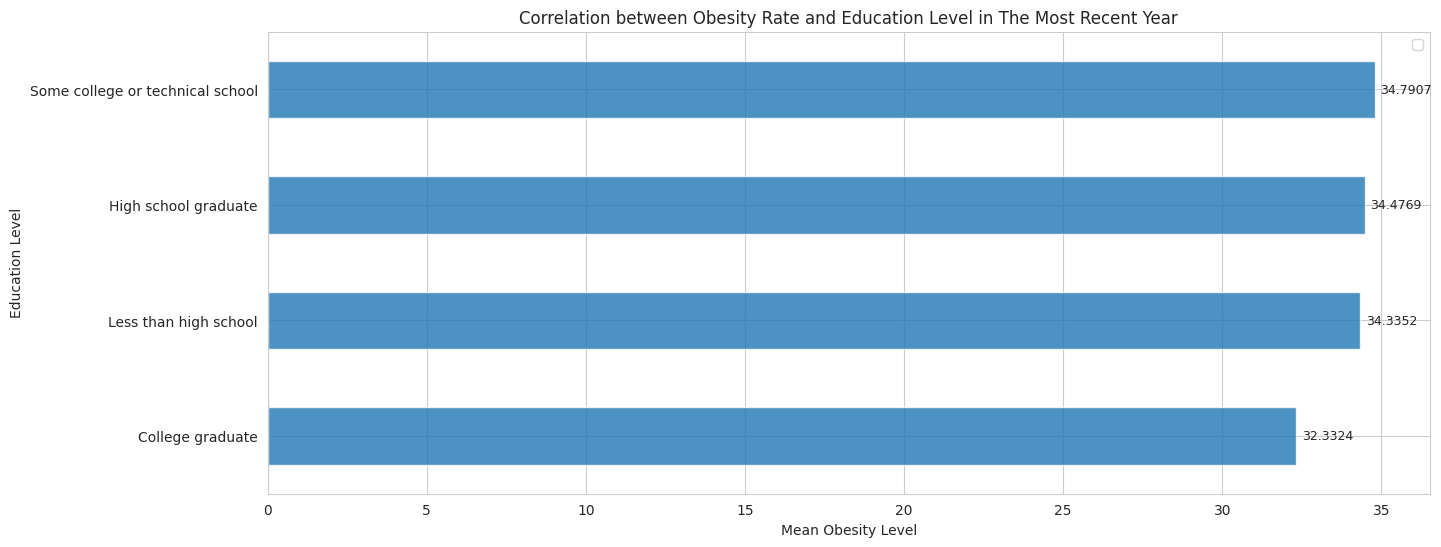

In [ ]:
df_obesity_ly = df_raw_data_version_2[(df_raw_data_version_2['Topic'] == 'Obesity / Weight Status') &
                              (df_raw_data_version_2['YearEnd'] == str_Start_Year_max_value) & (df_raw_data_version_2['StratificationCategory1'] == 'Education')]

# Pivot the data to get the mean obesity level for each education level group
df_pivot = pd.pivot_table(df_obesity_ly, values='Data_Value', index='Stratification1', aggfunc='mean')

# Sort the data by mean obesity level
df_pivot = df_pivot.sort_values(by='Data_Value', ascending=True)

# Create a horizontal bar chart showing the correlation between education level and obesity levels
ax = df_pivot.plot(kind='barh', figsize=(15, 6), alpha=0.8)
ax.set_xlabel('Mean Obesity Level')
ax.set_ylabel('Education Level')
ax.set_title('Correlation between Obesity Rate and Education Level in The Most Recent Year')

# Add data labels
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=4, fontsize=9)
plt.legend(labels=[])
plt.show()

**Takeaway**: Here, it appears the data suggests a clear connection with an increase in education and a reduction in expected obesity rate for adults. 

This is likely related into the higher likelyhood of higher wages due to higher education levels and this is why it looks strikingly similar to the data relating to obesity levels and annual income levels. 

Again we see greater than a 10% average difference in liklihood of obesity between the least likely, colege graduated individuals, and the most likley, those with less than a full high school education. 

The latest year chart shows that individuals with higher levels of education have lower mean obesity levels, while those with lower levels of education have higher mean obesity levels. This suggests that education level may be a factor in obesity prevalence, and that efforts to promote healthier behaviors and lifestyles should be targeted towards individuals with lower levels of education.

# **Correlation of Obesity Rate and Age in the United States**

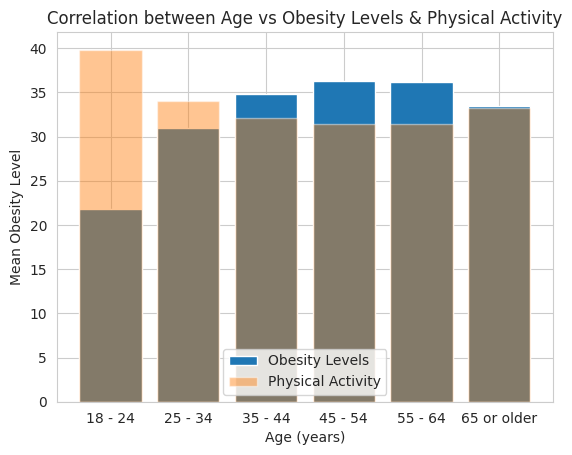

In [ ]:
# Filter the data to include only the 'Obesity / Weight Status' topic and the 'Total' stratification category
df_obesity = df_raw_data_version_2[(df_raw_data_version_2['Topic'] == 'Obesity / Weight Status') &
                         (df_raw_data_version_2['StratificationCategory1'] == 'Age (years)')]

# Group the data by age and calculate the mean obesity level for each age group
df_mean_obesity = df_obesity.groupby(['Stratification1']).agg({'Data_Value': 'mean'})

# Create a bar chart showing the correlation between age and obesity levels
plt.bar(df_mean_obesity.index, df_mean_obesity['Data_Value'], label='Obesity Levels')


# Filter the data to include only the 'Physical Activity - Behavior' topic and the 'Total' stratification category
df_obesity = df_raw_data_version_2[(df_raw_data_version_2['Topic'] == 'Physical Activity - Behavior') &
                         (df_raw_data_version_2['StratificationCategory1'] == 'Age (years)') & (df_raw_data_version_2['Question'] != 'Percent of adults who engage in no leisure-time physical activity')]

# Group the data by age and calculate the mean obesity level for each age group
df_mean_obesity = df_obesity.groupby(['Stratification1']).agg({'Data_Value': 'mean'})

# Create a bar chart showing the correlation between age and obesity levels
plt.bar(df_mean_obesity.index, df_mean_obesity['Data_Value'],alpha=0.45, label='Physical Activity')
plt.xlabel('Age (years)')
plt.ylabel('Mean Obesity Level')
plt.title('Correlation between Age vs Obesity Levels & Physical Activity')

plt.legend(loc='lower center')
plt.show()

**Takeaway**: From this chart, we can clearly see that people between the ages of 45 and 64 have the highest obesity rates. 

We went beyond the scope and also added in data of Physical activity (orange bar). This confirms a hypothesis we had that these age groups are also the least active physically. 

# **Correlation of Obesity Rate and Race/Ethnicity in the United States**

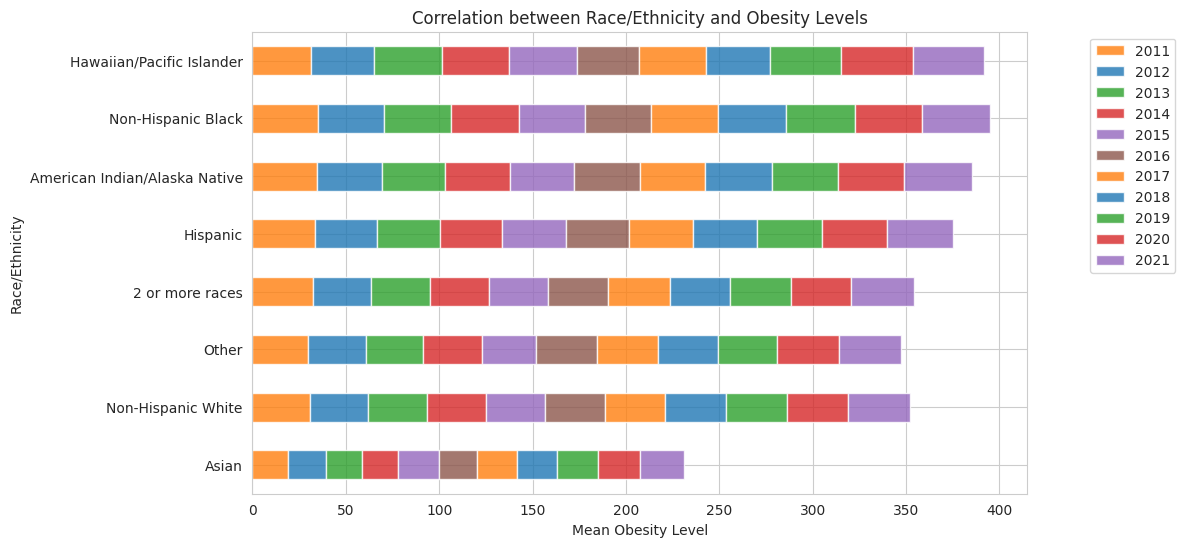

In [ ]:
# Filter the data to include only the 'Obesity / Weight Status' topic and the 'Total' stratification category
df_obesity = df_raw_data_version_2[(df_raw_data_version_2['Topic'] == 'Obesity / Weight Status') &
                         (df_raw_data_version_2['StratificationCategory1'] == 'Race/Ethnicity') &
                         (df_raw_data_version_2['Stratification1'] != 'Total')]

# Pivot the data to get the mean obesity level for each race/ethnicity group
df_pivot = pd.pivot_table(df_obesity, values='Data_Value', index='Stratification1', columns='YearEnd', aggfunc='mean')

# Sort the data by mean obesity level for the latest year
df_pivot.sort_values(by=str_Start_Year_max_value, ascending=True, inplace=True)

# Create a horizontal stacked bar chart showing the correlation between race/ethnicity and obesity levels
ax = df_pivot.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b'], alpha=0.8)
ax.set_xlabel('Mean Obesity Level')
ax.set_ylabel('Race/Ethnicity')
ax.set_title('Correlation between Race/Ethnicity and Obesity Levels')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.show()

#This chart has been created with high utilization of ChatGPT. 

**Takeaway**: From this chart, we can infer that among different racial/ethnic groups, 'non-Hispanic Black' individuals have the highest mean obesity levels, followed by 'Hawaiian/Pacific Islander' individuals. This information can be used to inform public health policies and initiatives to address obesity and related health issues in different racial/ethnic groups.

KeyError: ignored

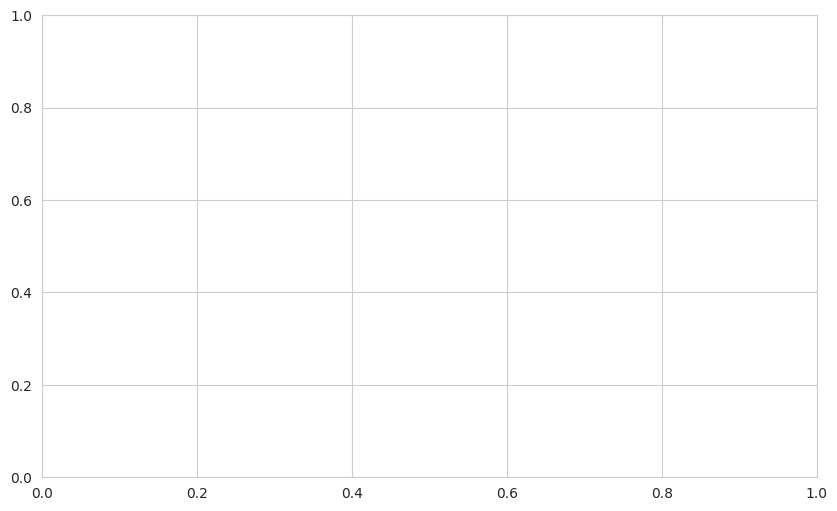

In [ ]:
# Define colors for each race/ethnicity
colors = {'Black, non-Hispanic': '#1f77b4',
          'Hispanic': '#ff7f0e',
          'Multiracial': '#2ca02c',
          'Other, non-Hispanic': '#d62728',
          'White, non-Hispanic': '#9467bd'}

# Filter the data to include only the 'Obesity / Weight Status' topic and the 'Total' stratification category
df_obesity = df_raw_data_version_2[(df_raw_data_version_2['Topic'] == 'Obesity / Weight Status') &
                         (df_raw_data_version_2['StratificationCategory1'] == 'Race/Ethnicity') &
                         (df_raw_data_version_2['Stratification1'] != 'Total')]

# Pivot the data to get the mean obesity level for each race/ethnicity group
df_pivot = pd.pivot_table(df_obesity, values='Data_Value', index='Stratification1', columns='YearEnd', aggfunc='mean')

# Sort the data by mean obesity level for the latest year
df_pivot.sort_values(by=str_Start_Year_max_value, ascending=True, inplace=True)

# Create a scatter plot to show the correlation between race/ethnicity and obesity levels
fig, ax = plt.subplots(figsize=(10, 6))
for race, group in df_grouped.groupby('Stratification1'):
    color = colors.get(race, '#8c564b')  # Default to a gray color for missing categories
    ax.scatter(group['YearEnd'], group['Data_Value'], label=race)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Mean Obesity Level')
ax.set_title('Correlation between Race/Ethnicity and Obesity Levels')

# Add a legend to show the different race/ethnicity categories
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Per recommendation, we have created a scatter plot too to show this correlation

# **Correlation of Obesity Rate and Gender in the United States**

In [ ]:
# Filter the data to include only the 'Obesity / Weight Status' topic and the 'Total' stratification category
df_obesity = df_raw_data_version_2[(df_raw_data_version_2['Topic'] == 'Obesity / Weight Status') &
                         (df_raw_data_version_2['StratificationCategory1'] == 'Gender') &
                         (df_raw_data_version_2['Stratification1'] != 'Total')]

# Pivot the data to get the mean obesity level for each gender group
df_pivot = pd.pivot_table(df_obesity, values='Data_Value', index='Stratification1', columns='YearEnd', aggfunc='mean')

# Sort the data by mean obesity level for the latest year
latest_year = df_pivot.columns[-1]
df_pivot = df_pivot.sort_values(by=latest_year)

# Create a grouped bar chart showing the correlation between gender and obesity levels
ax = df_pivot.plot(kind='bar', figsize=(25,4), width=0.8, color=['#1f77b4', '#d62728'])
ax.set_xlabel('Gender')
ax.set_ylabel('Mean Obesity Level')
ax.set_title('Correlation between Gender and Obesity Levels')
ax.legend(loc='upper right', labels=df_pivot.columns)

# Add data labels
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=4, fontsize=9)

plt.show()

**Takeaway**: This chart provides us with 2 insights:

1. that obesity levels in Males has been higher than in females throughtout the years.

2. that obesity levels has been just rising for both groups over the years, which is a serious cause for concern.

# **CONCLUSION**

**Report Conclusion**: 

In conclusion, the data clearly indicates a concerning trend of increasing obesity rates across different regions, income levels, education levels, age groups, and racial/ethnic groups. The data suggests that the South and Midwest regions are predominantly at risk of obesity. It also suggests a connection between inactivity, low consumption of fruits and vegetables, low income, and low education with high obesity rates. People between the ages of 45 and 64 are the least active physically and have the highest obesity rates. Among different racial/ethnic groups, non-Hispanic Black individuals have the highest mean obesity levels. Males have higher obesity rates than females, and both groups have seen a rise in obesity over the years. These findings highlight the urgent need for targeted public health policies and initiatives to address obesity and related health issues.


**Challenges**:

1. The team really struggled with the missing values. Replacing data with either mean, median or mode could create unwanted biases; on the other hand, removing those records altogether would also have large impact.

2. A lot more research can be done on this data to generate more overlapping insights among the 3 classes of data however due to severe lack of time, we were unable to pursue those.

3. Overall, the team did not have any prior coding experience hence while we had an idea of what we wanted to achieve, lack of programming skills posed a major hurdle.

4. If there was more time and a 3rd phase, we would look to coefficients of each of these factors by building a regression model.

**Citations**

1. Most of the data exploration has been done by ourselves
2. To create these charts, a combination of google, ChatGPT and class slides have been used. While we brainstormed and came up with what needed to be shown by ourselves, getting around the syntactical requirements would require too much time had we not used ChatGPT.
3. ChatGPT for most of these cases DID NOT give us the right solution. We had to update it ourselves in order to make it work.

**------------ END -------------**




# ARCHIVE: Unrequired / Failed Codes

Key-Indicators-and-Root-Cause-Analysis-of-Obesity-Epidemic-in-the-US

In [ ]:
# At first, we were downloading and saving the dataset in google drive but later realized we can directly read data from URL, hence commented out this code
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
The code below downloads data from Source website, saves it in a publicly available address in google drive with the name raw_data

#file_name = "raw_data.csv" #Putting the name of dataset imported
#url = "https://chronicdata.cdc.gov/views/g4ie-h725/rows.csv?accessType=DOWNLOAD&bom=true&format=true" #URL of source data

# Download the data from the URL - sourced from ChatGPT
#response = requests.get(url)
#content = response.content

# Create a pandas dataframe from the content  - sourced from ChatGPT
#data = pd.read_csv(io.StringIO(content.decode('utf-8')))

# Save the data to Google Drive
#data.to_csv('/content/drive/My Drive/' + file_name, index=False)

# Print a success message
#print("Data has been downloaded and saved to Google Drive successfully.")

Attempting to add labels that would only show if they fit in the chart

In [ ]:
# Filter the data to include only the 'Obesity / Weight Status' topic and the 'Total' stratification category
df_obesity = df_raw_data_version_2[(df_raw_data_version_2['Topic'] == 'Obesity / Weight Status') &
                         (df_raw_data_version_2['StratificationCategory1'] == 'Race/Ethnicity') &
                         (df_raw_data_version_2['Stratification1'] != 'Total')]

# Pivot the data to get the mean obesity level for each race/ethnicity group
df_pivot = pd.pivot_table(df_obesity, values='Data_Value', index='Stratification1', columns='YearEnd', aggfunc='mean')

# Sort the data by mean obesity level for the latest year
df_pivot.sort_values(by=str_Start_Year_max_value, ascending=True, inplace=True)

# Create a horizontal stacked bar chart showing the correlation between race/ethnicity and obesity levels
ax = df_pivot.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b'], alpha=0.8)
ax.set_xlabel('Mean Obesity Level')
ax.set_ylabel('Race/Ethnicity')
ax.set_title('Correlation between Race/Ethnicity and Obesity Levels')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Add data labels
#for i in ax.containers:
    #ax.bar_label(i, label_type='edge', padding=4, fontsize=7)
#for i in ax.containers:
#    ax.bar_label(i, label_type=lambda x: f'{x.get_width():.0f}\n({x.get_width()*100/df_pivot.sum(axis=1)[int(x.get_y())]:.1f}%)', padding=4)
plt.show()